In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plot_likert import plot_likert
from statsmodels.graphics.mosaicplot import mosaic
import bisect
import scipy.stats as stats
import numpy as np

# Część I

## Zadanie 1

### Wczytywanie danych

In [58]:
df = pd.read_csv("ankieta.csv", sep=";")
print(df.head())


  DZIAL  STAZ CZY_KIER  PYT_1  PYT_2  PYT_3 PLEC  WIEK
0    IT     2      Nie      1     -2      1    M    64
1    IT     2      Nie      0     -2     -2    M    67
2    IT     2      Nie      1      2      2    M    65
3    IT     2      Nie     -1     -2     -2    K    68
4    IT     3      Tak      1      2     -1    K    65


### Konwersja typów danych

In [59]:
df["STAZ"] = pd.to_numeric(df["STAZ"])
df["WIEK"] = pd.to_numeric(df["WIEK"])
df["PYT_1"] = pd.to_numeric(df["PYT_1"])
df["PYT_2"] = pd.to_numeric(df["PYT_2"])
df["PYT_3"] = pd.to_numeric(df["PYT_3"])

df["DZIAL"] = df["DZIAL"].astype(str)
df["CZY_KIER"] = df["CZY_KIER"].astype(str)
df["PLEC"] = df["PLEC"].astype(str)


In [60]:
print(df.dtypes)

DZIAL       object
STAZ         int64
CZY_KIER    object
PYT_1        int64
PYT_2        int64
PYT_3        int64
PLEC        object
WIEK         int64
dtype: object


### Sprawdzanie czy wystepują braki w danych

In [61]:
print(df.isnull().sum())

DZIAL       0
STAZ        0
CZY_KIER    0
PYT_1       0
PYT_2       0
PYT_3       0
PLEC        0
WIEK        0
dtype: int64


### Tworzenie zmiennej WIEK_KAT

In [62]:
bins = [0, 35, 45, 55, float('inf')]  
labels = ['do 35 lat', '36-45 lat', '46-55 lat', 'powyżej 55 lat'] 
df['WIEK_KAT'] = pd.cut(df['WIEK'], bins=bins, labels=labels, right=True)

### Tabele liczebności

In [63]:
tablica_licznosci = {
    "DZIAL": df["DZIAL"].value_counts(),
    "STAZ": df["STAZ"].value_counts(),
    "CZY_KIER": df["CZY_KIER"].value_counts(),
    "PLEC": df["PLEC"].value_counts(),
    "WIEK_KAT": df["WIEK_KAT"].value_counts()
}

for zmienna, liczności in tablica_licznosci.items():
    print(f"\nTabela liczności dla {zmienna}:")
    print(liczności)


Tabela liczności dla DZIAL:
DZIAL
PD    98
MK    45
HR    31
IT    26
Name: count, dtype: int64

Tabela liczności dla STAZ:
STAZ
2    140
1     41
3     19
Name: count, dtype: int64

Tabela liczności dla CZY_KIER:
CZY_KIER
Nie    173
Tak     27
Name: count, dtype: int64

Tabela liczności dla PLEC:
PLEC
M    129
K     71
Name: count, dtype: int64

Tabela liczności dla WIEK_KAT:
WIEK_KAT
36-45 lat         104
46-55 lat          45
do 35 lat          26
powyżej 55 lat     25
Name: count, dtype: int64


* Struktura firmy jest zdominowana przez dział PD, z niewielką reprezentacją działu IT.

* Pracownicy są głównie 36–45 lat i mają 2-letni staż.

* Większość to osoby niepełniące funkcji kierowniczych.
* Jest więcej mężczyzn niż kobiet.


### Wykresy kołowe i słupkowe dla PYT_1

C:\Users\admin\AppData\Local\Temp\ipykernel_6644\357748517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='PYT_1', data=df, palette="pastel")


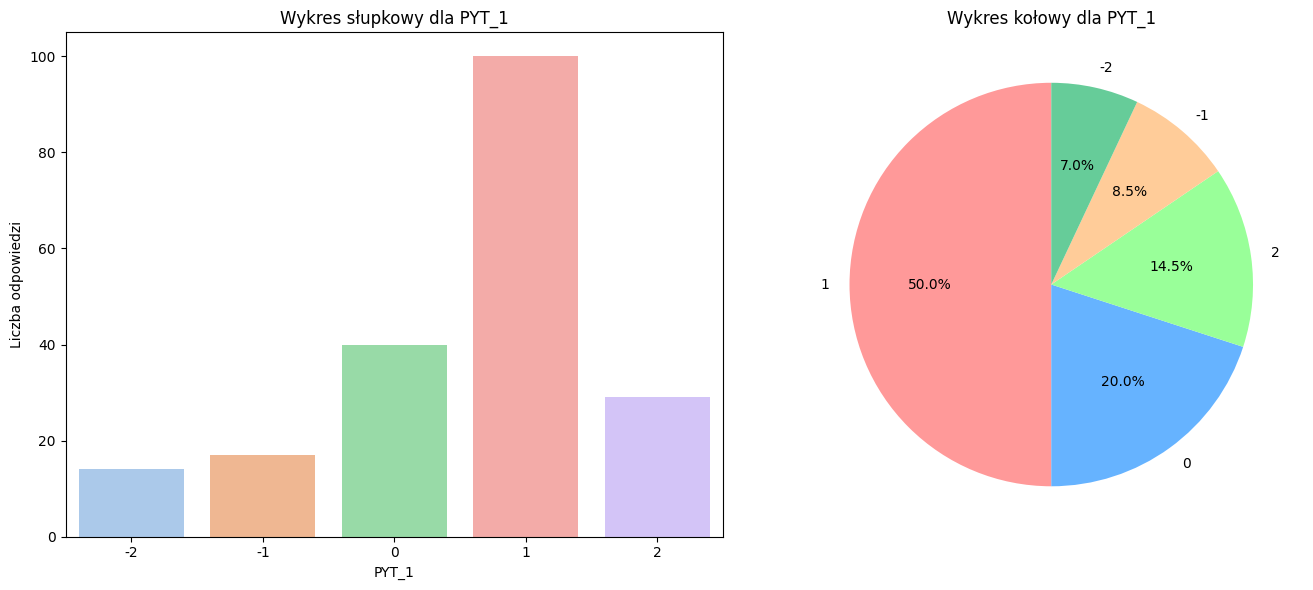

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(ax=axes[0], x='PYT_1', data=df, palette="pastel")
axes[0].set_title('Wykres słupkowy dla PYT_1')
axes[0].set_xlabel('PYT_1')
axes[0].set_ylabel('Liczba odpowiedzi')

df['PYT_1'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#66cc99"],
    ax=axes[1]
)
axes[1].set_title('Wykres kołowy dla PYT_1')
axes[1].set_ylabel('')  

plt.tight_layout()
plt.show()

Większość pracowników ocenia pozytywnie wsparcie i materiały oferowane przez firmę po szkoleniach. Negatywne opinie są w wyraźnej mniejszości, co może świadczyć o dobrze funkcjonującym systemie wdrażania wiedzy w praktyce.

### Wykresy kołowe i słupkowe dla PYT_2

C:\Users\admin\AppData\Local\Temp\ipykernel_6644\530445244.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='PYT_2', data=df, palette="pastel")


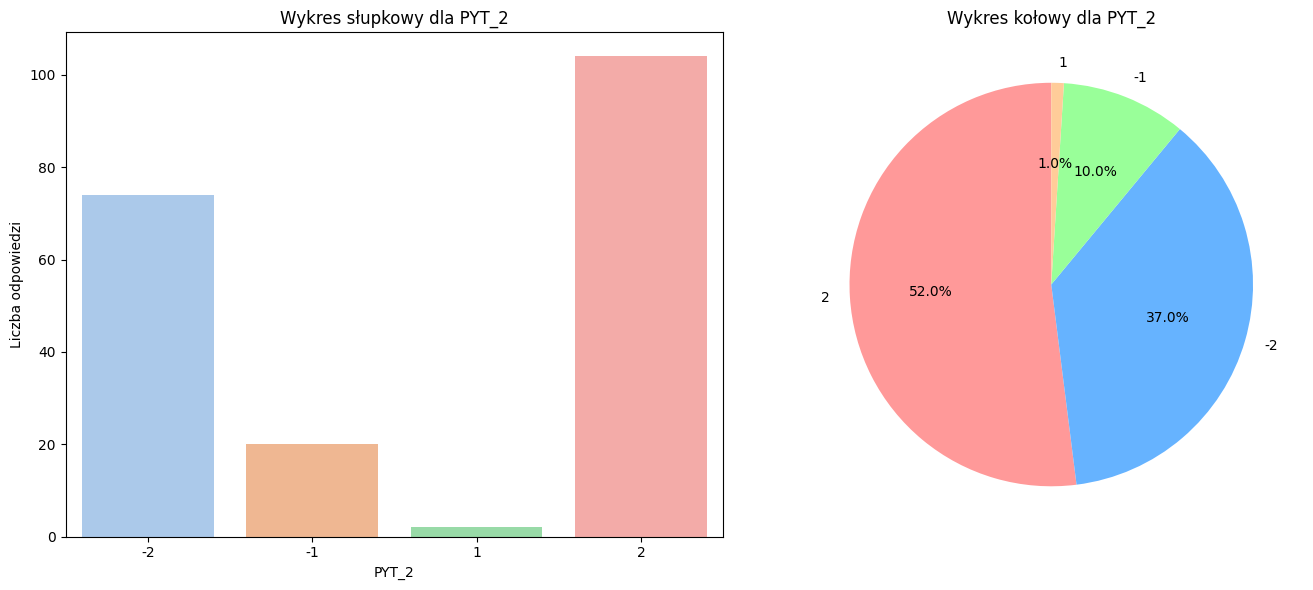

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(ax=axes[0], x='PYT_2', data=df, palette="pastel")
axes[0].set_title('Wykres słupkowy dla PYT_2')
axes[0].set_xlabel('PYT_2')
axes[0].set_ylabel('Liczba odpowiedzi')

df['PYT_2'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#cc9966"],
    ax=axes[1]
)
axes[1].set_title('Wykres kołowy dla PYT_2')
axes[1].set_ylabel('')  

plt.tight_layout()
plt.show()

Opinie na temat dopasowania szkoleń do indywidualnych potrzeb są silnie spolaryzowane – większość respondentów jest albo bardzo zadowolona, albo zdecydowanie niezadowolona. Wysoki odsetek osób niezadowolonych może wskazywać na potrzebę indywidualizacji oferty szkoleniowej lub lepszego dopasowania tematyki szkoleń do potrzeb różnych grup pracowników.

### Tablica wielodzielcze dla par zmiennych: PYT_1 i DZIAŁ, PYT_1 i STAŻ ,PYT_1 i CZY_KIER, PYT_1 i PŁEĆ oraz PYT_1 i WIEK_KAT.

In [85]:
tablica_pyt_1_dzial = pd.crosstab(df['PYT_1'], df['DZIAL'], margins=False)
print("Tablica dla PYT_1 i DZIAŁ:\n", tablica_pyt_1_dzial)



Tablica dla PYT_1 i DZIAŁ:
 DZIAL  HR  IT  MK  PD
PYT_1                
-2      2   0   3   9
-1      2   2   3  10
 0      5   4  14  17
 1     19  15  15  51
 2      3   5  10  11


 Pracownicy działu PD czują największe wsparcie szkoleniowe, natomiast dział MK ma większy rozrzut ocen (w tym także negatywnych).

In [86]:
tablica_pyt_1_staz = pd.crosstab(df['PYT_1'], df['STAZ'], margins=False)
print("\nTablica dla PYT_1 i STAZ:\n", tablica_pyt_1_staz)


Tablica dla PYT_1 i STAZ:
 STAZ    1   2  3
PYT_1           
-2      5   5  4
-1      6  10  1
 0      8  26  6
 1     19  75  6
 2      3  24  2


Najbardziej pozytywnie oceniają wsparcie pracownicy z dwuletnim stażem, co może świadczyć o dobrym dopasowaniu szkoleń do osób już lekko wdrożonych, ale jeszcze nie wypalonych zawodowo.

In [87]:
tablica_pyt_1_czy_kier = pd.crosstab(df['PYT_1'], df['CZY_KIER'], margins=False)
print("\nTablica dla PYT_1 i CZY_KIER:\n", tablica_pyt_1_czy_kier)


Tablica dla PYT_1 i CZY_KIER:
 CZY_KIER  Nie  Tak
PYT_1             
-2         10    4
-1         14    3
 0         34    6
 1         88   12
 2         27    2


Kadra kierownicza może mieć wyższe oczekiwania co do jakości wsparcia szkoleniowego lub ocenia je bardziej surowo.

In [88]:
tablica_pyt_1_plec = pd.crosstab(df['PYT_1'], df['PLEC'], margins=False)
print("\nTablica dla PYT_1 i PŁEC:\n", tablica_pyt_1_plec)



Tablica dla PYT_1 i PŁEC:
 PLEC    K   M
PYT_1        
-2      3  11
-1      7  10
 0     14  26
 1     36  64
 2     11  18


Mężczyźni nieco częściej niż kobiety wskazują wysoką satysfakcję z oferowanego wsparcia i materiałów.

In [89]:
tablica_pyt_1_wiek_kat = pd.crosstab(df['PYT_1'], df['WIEK_KAT'], margins=False)
print("\nTablica dla PYT_1 i WIEK_KAT:\n", tablica_pyt_1_wiek_kat)


Tablica dla PYT_1 i WIEK_KAT:
 WIEK_KAT  do 35 lat  36-45 lat  46-55 lat  powyżej 55 lat
PYT_1                                                    
-2                1         11          2               0
-1                6          7          1               3
 0                3         24          5               8
 1               13         50         25              12
 2                3         12         12               2


 Grupa wiekowa 36–45 lat jest najbardziej zaangażowana i spolaryzowana w ocenie – są tam zarówno najwyższe, jak i najniższe oceny.

### Tablica wielodzielcza dla pary zmiennych: PYT_2 i PYT_3.

In [48]:
tablica_pyt_2_pyt_3 = pd.crosstab(df['PYT_2'], df['PYT_3'], margins=True, margins_name="Suma")

print("Tablica dla PYT_2 i PYT_3:\n", tablica_pyt_2_pyt_3)


Tablica dla PYT_2 i PYT_3:
 PYT_3  -2  -1   1   2  Suma
PYT_2                      
-2     49  16   5   4    74
-1      3   6  10   1    20
1       0   0   2   0     2
2       0   8  15  81   104
Suma   52  30  32  86   200


Wielu respondentów utrzymało swoje zdecydowane opinie, zarówno bardzo negatywne, jak i bardzo pozytywne. Część osób po szkoleniach wyraziła bardziej pozytywne zdanie, co sugeruje, że odczuły one realne korzyści z udziału w programie. Jednak zauważalne są także przypadki pogorszenia opinii, co może świadczyć o tym, że szkolenia nie spełniły oczekiwań wszystkich uczestników, a w niektórych przypadkach mogły wręcz wywołać efekt odwrotny do zamierzonego.

### Tworzenie zmiennej CZY_ZADOW

In [90]:
df.loc[df['PYT_2'] <= -1, 'CZY_ZADOW'] = 'NIE'
df.loc[df['PYT_2'] >= 1, 'CZY_ZADOW'] = 'TAK'

df


,DZIAL,STAZ,CZY_KIER,PYT_1,PYT_2,PYT_3,PLEC,WIEK,WIEK_KAT,CZY_ZADOW
0,IT,2,Nie,1,-2,1,M,64,powyżej 55 lat,NIE
1,IT,2,Nie,0,-2,-2,M,67,powyżej 55 lat,NIE
2,IT,2,Nie,1,2,2,M,65,powyżej 55 lat,TAK
3,IT,2,Nie,-1,-2,-2,K,68,powyżej 55 lat,NIE
4,IT,3,Tak,1,2,-1,K,65,powyżej 55 lat,TAK
...,...,...,...,...,...,...,...,...,...,...
195,HR,2,Nie,1,2,2,M,42,36-45 lat,TAK
196,HR,2,Nie,1,-1,-1,K,35,do 35 lat,NIE
197,HR,2,Nie,-1,-2,-2,K,39,36-45 lat,NIE
198,HR,2,Nie,1,2,1,K,48,46-55 lat,TAK


### Wykresy mozaikowe

<Figure size 800x600 with 0 Axes>

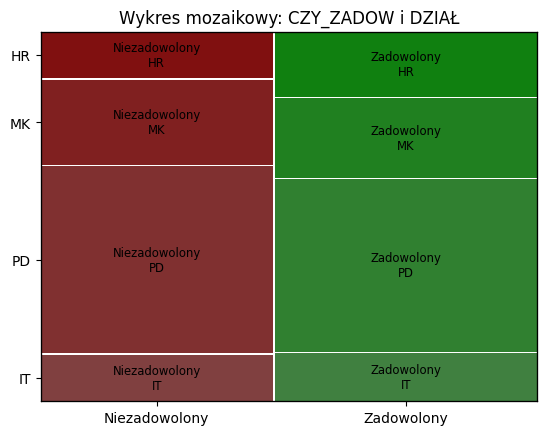

<Figure size 800x600 with 0 Axes>

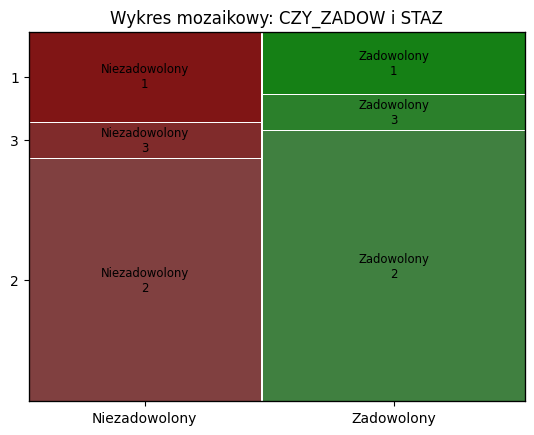

<Figure size 800x600 with 0 Axes>

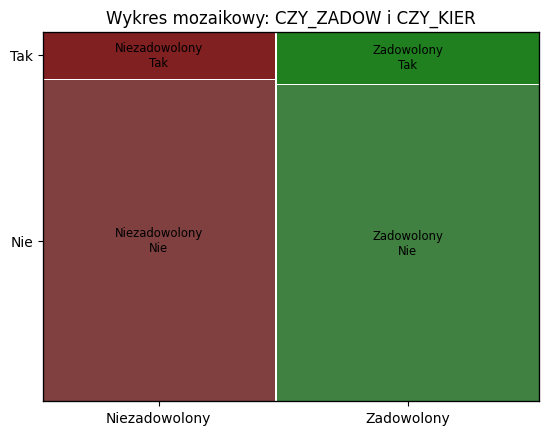

<Figure size 800x600 with 0 Axes>

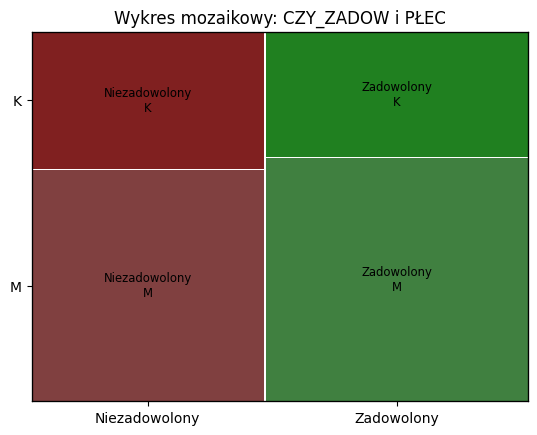

<Figure size 800x600 with 0 Axes>

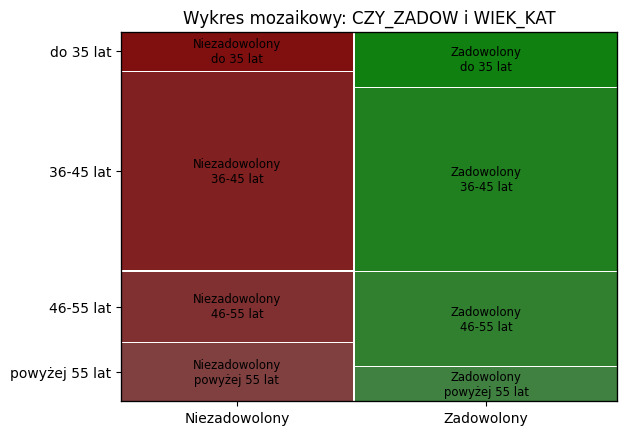

In [50]:
plt.figure(figsize=(8, 6))
mosaic(df, ['CZY_ZADOW', 'DZIAL'])
plt.title('Wykres mozaikowy: CZY_ZADOW i DZIAŁ')
plt.show()

plt.figure(figsize=(8, 6))
mosaic(df, ['CZY_ZADOW', 'STAZ'])
plt.title('Wykres mozaikowy: CZY_ZADOW i STAZ')
plt.show()

plt.figure(figsize=(8, 6))
mosaic(df, ['CZY_ZADOW', 'CZY_KIER'])
plt.title('Wykres mozaikowy: CZY_ZADOW i CZY_KIER')
plt.show()

plt.figure(figsize=(8, 6))
mosaic(df, ['CZY_ZADOW', 'PLEC'])
plt.title('Wykres mozaikowy: CZY_ZADOW i PŁEC')
plt.show()

plt.figure(figsize=(8, 6))
mosaic(df, ['CZY_ZADOW', 'WIEK_KAT'])
plt.title('Wykres mozaikowy: CZY_ZADOW i WIEK_KAT')
plt.show()

* Działy: Poziom zadowolenia różni się w zależności od działu. Najwięcej niezadowolonych pracowników znajduje się w dziale PD, natomiast jest on równiez największym działem. Dział IT wykazuje najniższy udział w ogólnej strukturze, ale z relatywnie zrównoważonym poziomem zadowolenia i niezadowolenia.

* Stąż pracy: Osoby o stażu niższym niż rok mają największy odsetek niezadowolenia. W grupie o najdłuższym stażu odpowiedzi rozkładają się równomiernie między osoby zadowolone i niezadowolone.

* Funkcja kierownicza: Osoby pełniące funkcje kierownicze są częściej niezadowolone niż pracownicy niekierujący zespołami.

* Płeć: Różnice w poziomie zadowolenia między kobietami a mężczyznami są niewielkie. Obie grupy mają porównywalne proporcje odpowiedzi pozytywnych i negatywnych.

* Wiek: Największy poziom niezadowolenia obserwuje się w grupie wiekowej 36–45 lat. W grupach wiekowych 36-40 lat i powyżej 55 lat przeważają negatywne oceny wsparcia szkoleniowego, podczas gdy pracownicy do 35 lat i średnia kadra 41-55 lat wyrażają zadowolenie. 

# Część II

## Zadanie 2

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\plot_likert\plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


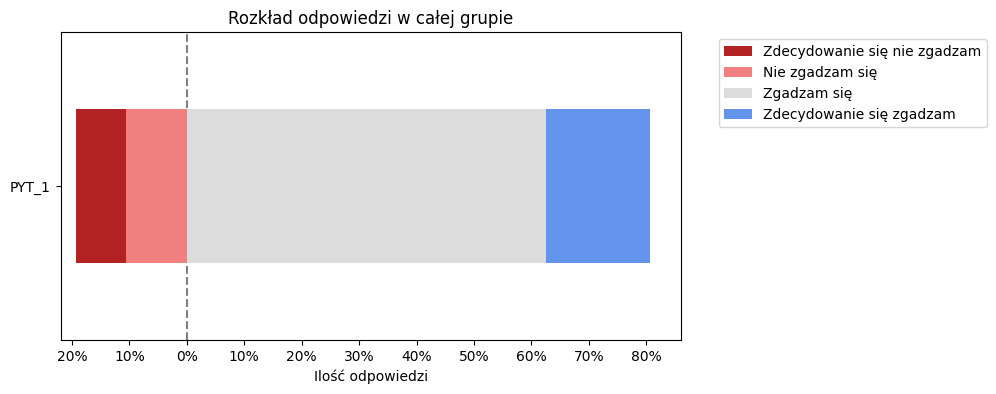

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\plot_likert\plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


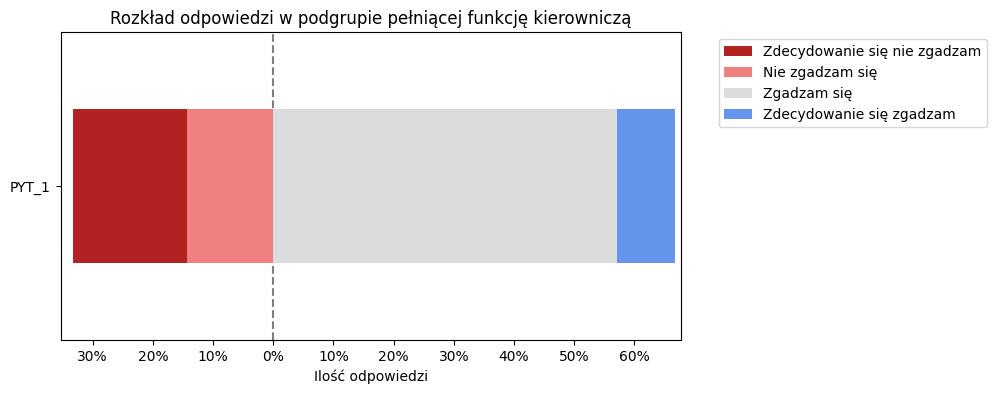

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\plot_likert\plot_likert.py:257: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(validate)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\plot_likert\plot_likert.py:310: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses_to_first_question = responses_per_question[0]


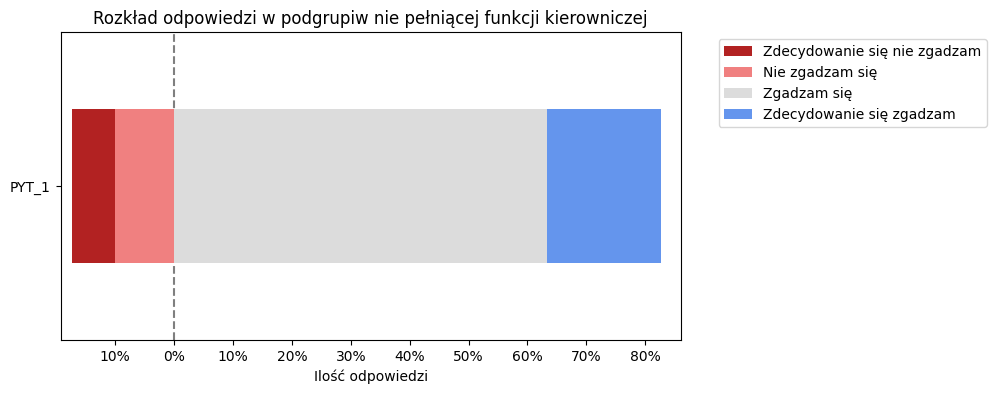

In [92]:
likert_labels = {
    -2: "Zdecydowanie się nie zgadzam",
    -1: "Nie zgadzam się",
     1: "Zgadzam się",
     2: "Zdecydowanie się zgadzam"
}

df['PYT_1'] = df['PYT_1'].map(likert_labels)

plot_scale = [
    "Zdecydowanie się nie zgadzam",
    "Nie zgadzam się",
    "Zgadzam się",
    "Zdecydowanie się zgadzam"
]

fig, ax = plt.subplots(figsize=(8, 4))
plot_likert(df[['PYT_1']], plot_scale=plot_scale, ax=ax,plot_percentage=True)
plt.title("Rozkład odpowiedzi w całej grupie")
ax.set_xlabel("Ilość odpowiedzi")  
plt.show()

sub_df_kier = df[df['CZY_KIER'] == 'Tak']
fig, ax = plt.subplots(figsize=(8, 4))
plot_likert(sub_df_kier[['PYT_1']], plot_scale=plot_scale, ax=ax,plot_percentage=True)
ax.set_xlabel("Ilość odpowiedzi")
plt.title("Rozkład odpowiedzi w podgrupie pełniącej funkcję kierowniczą")
plt.show()

sub_df_niekier = df[df['CZY_KIER'] == 'Nie']
fig, ax = plt.subplots(figsize=(8, 4))
plot_likert(sub_df_niekier[['PYT_1']], plot_scale=plot_scale, ax=ax,plot_percentage=True)
ax.set_xlabel("Ilość odpowiedzi")
plt.title("Rozkład odpowiedzi w podgrupiw nie pełniącej funkcji kierowniczej")
plt.show()



Ogólny odbiór wsparcia i materiałów poszkoleniowych w firmie jest pozytywny – większość pracowników deklaruje, że otrzymuje odpowiednie narzędzia do praktycznego wykorzystania zdobytej wiedzy. Wśród osób na stanowiskach kierowniczych widać jednak większy poziom niezadowolenia w tym obszarze.

## Zadanie 3


In [52]:
sample_size = int(0.1 * len(df))

indices_without_replacement = np.random.choice(df.index, size=sample_size, replace=False)
indices_with_replacement = np.random.choice(df.index, size=sample_size, replace=True)

sample_without_replacement_np = df.loc[indices_without_replacement]
sample_with_replacement_np = df.loc[indices_with_replacement]


print("Próbka bez zwracania:")
print(sample_without_replacement_np.head())

print("\nPróbka ze zwracaniem:")
print(sample_with_replacement_np.head())

print(f"\nCałkowita liczba rekordów: {len(df)}")
print(f"Liczba rekordów w próbce: {sample_size}")
print("\nLiczba unikalnych rekordów w próbce:")
print(f"Bez zwracania: {len(sample_without_replacement_np.drop_duplicates())}")
print(f"Ze zwracaniem: {len(sample_with_replacement_np.drop_duplicates())}")


Próbka bez zwracania:
    DZIAL  STAZ CZY_KIER                     PYT_1  PYT_2  PYT_3 PLEC  WIEK
101    PD     2      Nie               Zgadzam się     -1      1    K    43
167    MK     2      Nie  Zdecydowanie się zgadzam      2      2    M    38
90     PD     2      Nie               Zgadzam się      2      2    M    36
152    MK     2      Nie               Zgadzam się     -1     -1    M    65
102    PD     2      Nie                       NaN     -2     -2    K    40

Próbka ze zwracaniem:
   DZIAL  STAZ CZY_KIER                         PYT_1  PYT_2  PYT_3 PLEC  WIEK
26    PD     2      Tak                   Zgadzam się      2      2    M    28
29    PD     1      Nie                           NaN     -2      1    M    27
86    PD     1      Nie  Zdecydowanie się nie zgadzam     -2     -2    M    49
26    PD     2      Tak                   Zgadzam się      2      2    M    28
6     IT     2      Tak      Zdecydowanie się zgadzam      2      1    K    57

Całkowita liczba rekordó

## Zadanie 4

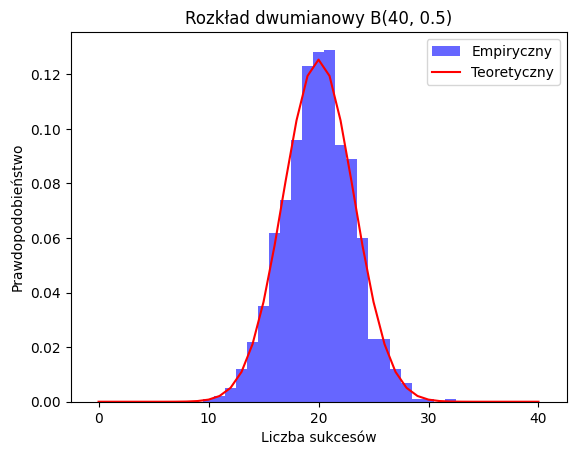

Teoretyczna średnia: 20.00, Empiryczna średnia: 20.00
Teoretyczna wariancja: 10.00, Empiryczna wariancja: 10.03


In [ ]:
def symuluj_dwumian(n, p, size=1000):
    return np.sum(np.random.rand(size, n) < p, axis=1)  
n = 40
p = 0.5
size = 1000  
probki = symuluj_dwumian(n, p, size)

mean_theoretical = n * p
var_theoretical = n * p * (1 - p)

mean_empirical = np.mean(probki)
var_empirical = np.var(probki)

x = np.arange(0, n + 1)
pmf_values = stats.binom.pmf(x, n, p)

plt.hist(probki, bins=np.arange(n + 2) - 0.5, density=True, alpha=0.6, color="blue", label="Empiryczny")
plt.plot(x, pmf_values, markersize=8, label="Teoretyczny",color='red')
plt.xlabel("Liczba sukcesów")
plt.ylabel("Prawdopodobieństwo")
plt.title(f"Rozkład dwumianowy B({n}, {p})")
plt.legend()
plt.show()

print(f"Teoretyczna średnia: {mean_theoretical:.2f}, Empiryczna średnia: {mean_empirical:.2f}")
print(f"Teoretyczna wariancja: {var_theoretical:.2f}, Empiryczna wariancja: {var_empirical:.2f}")


## Zadanie 5

In [54]:
def simulate_multinomial(n: int, p: np.ndarray) -> np.ndarray:
    if not np.isclose(np.sum(p), 1.0):
        raise ValueError("Wektor prawdopodobieństw musi sumować się do 1.")
    
    random_numbers = np.random.uniform(0, 1, n)
    cum_prob = np.cumsum(p)
    result = np.zeros(len(p))
    
    for num in random_numbers:
        idx = bisect.bisect(cum_prob, num)
        result[idx] += 1

    return result

n = 10000             
p = np.array([0.2, 0.5, 0.3])   

np.random.seed(42)   
empirical_counts = simulate_multinomial(n, p)

theoretical_mean = n * p
theoretical_cov = n * (np.diag(p) - np.outer(p, p))

empirical_probs = empirical_counts / n
empirical_mean = empirical_counts
empirical_cov = np.cov(np.random.multinomial(n=1, pvals=p, size=n).T) * n

print("Teoretyczna średnia:", theoretical_mean)
print("Empiryczna średnia:", empirical_mean)

print("\nTeoretyczna macierz kowariancji:\n", theoretical_cov)
print("\nEmpiryczna macierz kowariancji:\n", empirical_cov)


Teoretyczna średnia: [2000. 5000. 3000.]
Empiryczna średnia: [2043. 5070. 2887.]

Teoretyczna macierz kowariancji:
 [[ 1600. -1000.  -600.]
 [-1000.  2500. -1500.]
 [ -600. -1500.  2100.]]

Empiryczna macierz kowariancji:
 [[ 1585.7009701   -971.30113011  -614.39983998]
 [ -971.30113011  2499.52745275 -1528.22632263]
 [ -614.39983998 -1528.22632263  2142.62616262]]


# Część V

## Zadanie 12

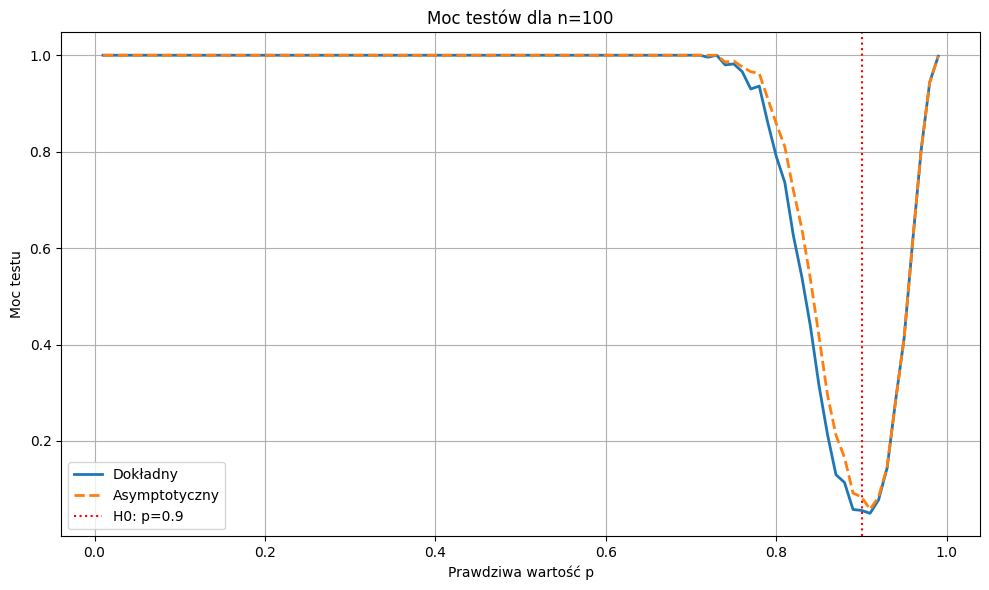

     Moc Dokładna                      Moc Asymptotyczna                     
n             20     50     100    200               20     50     100    200
p                                                                            
0.70        0.774  0.954  1.000  1.000             0.774  0.954  1.000  1.000
0.80        0.374  0.580  0.790  0.974             0.374  0.580  0.858  0.974
0.85        0.154  0.208  0.316  0.580             0.154  0.208  0.418  0.580
0.90        0.042  0.034  0.056  0.044             0.042  0.034  0.084  0.044
0.95        0.006  0.086  0.414  0.712             0.006  0.086  0.414  0.712
0.99        0.000  0.642  0.998  1.000             0.000  0.642  0.998  1.000


In [ ]:
from scipy.stats import norm, binomtest

def powertest(N, n, al, p0):
    p = np.linspace(0.01, 0.99, 99)
    exact, asym = [], []

    for pi in p:
        k = np.random.binomial(n, pi, N)
        pvals_exact = [binomtest(x, n, p0, alternative='two-sided').pvalue for x in k]
        exact.append(np.mean(np.array(pvals_exact) < al))

        p_hat = k / n
        z = (p_hat - p0) / np.sqrt(p0*(1-p0)/n)
        pvals_asym = 2 * (1 - norm.cdf(np.abs(z)))
        asym.append(np.mean(pvals_asym < al))

    return exact, asym, p

N = 500
al = 0.05
p0 = 0.9
sample_sizes = [20, 50, 100, 200]
selected_p = [0.7, 0.8, 0.85, 0.9, 0.95, 0.99]

results = {}
for n in sample_sizes:
    exact, asym, p_vals = powertest(N, n, al, p0)
    results[n] = {
        'p': p_vals,
        'exact': exact,
        'asym': asym
    }

p_plot = results[100]['p']
exact_plot = results[100]['exact']
asym_plot = results[100]['asym']

plt.figure(figsize=(10, 6))
plt.plot(p_plot, exact_plot, label='Dokładny', lw=2)
plt.plot(p_plot, asym_plot, '--', label='Asymptotyczny', lw=2)
plt.axvline(p0, color='r', linestyle=':', label=f'H0: p={p0}')
plt.xlabel('Prawdziwa wartość p')
plt.ylabel('Moc testu')
plt.title('Moc testów dla n=100')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

tabela_data = []
for n in [20, 50, 100, 200]:
    p_vals = results[n]['p']
    exact_vals = results[n]['exact']
    asym_vals = results[n]['asym']
    for target_p in selected_p:
        idx = (np.abs(p_vals - target_p)).argmin()
        tabela_data.append({
            'n': n,
            'p': round(p_vals[idx], 2),
            'Moc Dokładna': round(exact_vals[idx], 3),
            'Moc Asymptotyczna': round(asym_vals[idx], 3)
        })

df = pd.DataFrame(tabela_data)
print(df.pivot(index='p', columns='n', values=['Moc Dokładna', 'Moc Asymptotyczna']))


Analiza wykazała, że moc testów rośnie wraz z licznością próby oraz odległością wartości parametru od hipotezy zerowej. Test asymptotyczny okazał się średnio bardziej czuły niż test dokładny dla małych prób (n < 100), jednak przy większych próbach różnice między nimi zanikają. W przypadku rzadkich zdarzeń lub niewielkich prób preferowane są metody dokładne. Dla uzyskania wysokiej precyzji pomiarów zaleca się stosowanie prób o liczności powyżej 500 obserwacji.